In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import csv
import os
from glob import glob
import scipy.io.wavfile
import matplotlib.pyplot as plt
import pywt
import shutil
from pywt import wavedec

In [ ]:
drive.mount('/content/drive')
path_base = "/content/drive/MyDrive/Data Tugas Akhir"
Preprocess_N = f'{path_base}{os.sep}Preprocess_N/'
Extracted_wavelet = f'{path_base}{os.sep}Wavelet_Extracted_N/'
audio_files_N = glob(Preprocess_N  + '*.wav')

Mounted at /content/drive


In [ ]:
def wavelet_extraction(data, coeff, dwt, db, level):
    N = np.array(data).size
    a, ds = dwt[0], list(reversed(dwt[1:]))

    if coeff =='a':
        return pywt.upcoef('a', a, db, level=level)[:N]
    elif coeff == 'd':
        return pywt.upcoef('d', ds[level-1], db, level=level)[:N]
    else:
        raise ValueError("Invalid coefficients: {}".format(coeff))

In [ ]:
features_wavelet = []
wavelet_file = []
count = 1
db = 'db6'
level = 4
directory = Preprocess_N
for audio in os.listdir(directory):
    audio_path = directory+audio
    data_wave, sr = librosa.load(audio_path, res_type='kaiser_best')
    coeffs = pywt.wavedec(data_wave, db, level=level)
    A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
    D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
    D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
    D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
    D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
    wavelets = A4 + D4 + D3 + D2 + D1
    file_name = "Extracted_wavelet_N_%s.csv" % count
    pd.DataFrame(wavelets).to_csv(file_name)
    wavelet_file.append(file_name)
    features_wavelet.append(wavelets)
    count = count+1

In [ ]:
wavelet_file

['Extracted_wavelet_N_1.csv',
 'Extracted_wavelet_N_2.csv',
 'Extracted_wavelet_N_3.csv',
 'Extracted_wavelet_N_4.csv',
 'Extracted_wavelet_N_5.csv',
 'Extracted_wavelet_N_6.csv',
 'Extracted_wavelet_N_7.csv',
 'Extracted_wavelet_N_8.csv',
 'Extracted_wavelet_N_9.csv',
 'Extracted_wavelet_N_10.csv',
 'Extracted_wavelet_N_11.csv',
 'Extracted_wavelet_N_12.csv',
 'Extracted_wavelet_N_13.csv',
 'Extracted_wavelet_N_14.csv',
 'Extracted_wavelet_N_15.csv',
 'Extracted_wavelet_N_16.csv',
 'Extracted_wavelet_N_17.csv',
 'Extracted_wavelet_N_18.csv',
 'Extracted_wavelet_N_19.csv',
 'Extracted_wavelet_N_20.csv',
 'Extracted_wavelet_N_21.csv',
 'Extracted_wavelet_N_22.csv',
 'Extracted_wavelet_N_23.csv',
 'Extracted_wavelet_N_24.csv',
 'Extracted_wavelet_N_25.csv',
 'Extracted_wavelet_N_26.csv',
 'Extracted_wavelet_N_27.csv',
 'Extracted_wavelet_N_28.csv',
 'Extracted_wavelet_N_29.csv',
 'Extracted_wavelet_N_30.csv',
 'Extracted_wavelet_N_31.csv',
 'Extracted_wavelet_N_32.csv',
 'Extracted_wavel

In [ ]:
base_directory = "/content"
for f in wavelet_file:
    src_path = os.path.join(base_directory, f)
    dst_path = os.path.join(Extracted_wavelet, f)
    shutil.move(src_path, dst_path)

In [ ]:
features_wavelet

[array([ 2.2454291e-08,  9.9572844e-08,  2.0186417e-07, ...,
        -2.8677925e-04, -2.9378411e-04, -2.7126184e-04], dtype=float32),
 array([1.7752988e-08, 7.8725051e-08, 3.4518121e-07, ..., 2.6721141e-06,
        2.6401972e-06, 1.1307950e-06], dtype=float32),
 array([ 1.0765842e-08,  4.7740787e-08,  9.0486409e-08, ...,
        -7.3948115e-07, -1.5492519e-06, -4.2928168e-06], dtype=float32),
 array([ 8.2517410e-08,  3.6592093e-07,  1.3331074e-06, ...,
        -2.0520857e-03, -2.0376965e-03, -2.0021023e-03], dtype=float32),
 array([1.2146874e-08, 5.3864930e-08, 1.1395014e-07, ..., 1.6838110e-04,
        1.5528142e-04, 1.1368177e-04], dtype=float32),
 array([-1.3259965e-06, -5.8800906e-06, -1.6164202e-05, ...,
         6.1300923e-08,  6.7207665e-08,  7.2922084e-08], dtype=float32),
 array([-3.1413478e-08, -1.3930207e-07, -3.0075967e-07, ...,
        -2.6895598e-06, -3.4489940e-06, -1.5772142e-06], dtype=float32),
 array([-3.8535035e-07, -1.7088239e-06, -2.7951362e-06, ...,
         3.32

Menghitung Mean

In [ ]:
wavelet_means = []
for i in features_wavelet:
  mean = np.mean(i)
  wavelet_means.append(mean)

In [ ]:
df_mean = pd.DataFrame(wavelet_means, columns=['Mean']) 
df_mean

,Mean
0,-1.077873e-08
1,1.998774e-08
2,-1.381718e-09
3,1.343692e-07
4,1.609750e-07
...,...
275,-2.017834e-08
276,7.561746e-10
277,-2.599738e-08
278,-8.332804e-09


In [ ]:
wavelet_std = []
for i in features_wavelet:
  std = np.std(i)
  wavelet_std.append(std)

In [ ]:
df_std = pd.DataFrame(wavelet_std, columns=['Std']) 
df_std

,Std
0,0.000111
1,0.000145
2,0.000157
3,0.000283
4,0.000304
...,...
275,0.000268
276,0.000188
277,0.000274
278,0.000066


In [ ]:
wavelet_max = []
for i in features_wavelet:
  max = np.max(i)
  wavelet_max.append(max)

In [ ]:
df_max = pd.DataFrame(wavelet_max, columns=['Max']) 
df_max

,Max
0,0.002064
1,0.006505
2,0.008834
3,0.004540
4,0.004804
...,...
275,0.009101
276,0.009500
277,0.007596
278,0.002409


In [ ]:
wavelet_Min = []
for i in features_wavelet:
  min = np.min(i)
  wavelet_Min.append(min)

In [ ]:
df_min = pd.DataFrame(wavelet_Min, columns=['Min']) 
df_min

,Min
0,-0.003462
1,-0.004661
2,-0.008031
3,-0.004703
4,-0.003446
...,...
275,-0.006585
276,-0.008690
277,-0.003656
278,-0.001755


In [ ]:
wavelet_Med = []
for i in features_wavelet:
  Med = np.median(i)
  wavelet_Med.append(Med)

In [ ]:
df_med = pd.DataFrame(wavelet_Med, columns=['Med']) 
df_mean

,Mean
0,-1.077873e-08
1,1.998774e-08
2,-1.381718e-09
3,1.343692e-07
4,1.609750e-07
...,...
275,-2.017834e-08
276,7.561746e-10
277,-2.599738e-08
278,-8.332804e-09


In [ ]:
wavelet_Var = []
for i in features_wavelet:
  Var = np.var(i)
  wavelet_Var.append(Var)

In [ ]:
df_var = pd.DataFrame(wavelet_Var, columns=['Var']) 
df_var

,Var
0,1.230376e-08
1,2.116875e-08
2,2.469661e-08
3,7.997333e-08
4,9.217519e-08
...,...
275,7.187328e-08
276,3.522902e-08
277,7.503459e-08
278,4.342473e-09


In [ ]:
from scipy.stats import skew

In [ ]:
wavelet_Skew = []
for i in features_wavelet:
  Skew = skew(i, axis=0, bias=True)
  wavelet_Skew.append(Skew)

In [ ]:
skew_means = []
for i in wavelet_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Skew']) 
df_skew

,Skew
0,-2.676393
1,1.223341
2,0.644493
3,1.266656
4,1.845351
...,...
275,1.610816
276,0.935276
277,-0.136935
278,2.474076


In [ ]:
wavelet_Q1 = []
for i in features_wavelet:
  Q1 = np.percentile(i, 25) 
  wavelet_Q1.append(Q1)

In [ ]:
df_q1 = pd.DataFrame(wavelet_Q1, columns=['Q1']) 
df_q1

,Q1
0,-3.258850e-07
1,-9.479996e-07
2,-2.065712e-06
3,-5.722761e-06
4,-3.412378e-06
...,...
275,-1.769720e-06
276,-1.490205e-06
277,-5.030708e-07
278,-3.131197e-07


In [ ]:
wavelet_Q3 = []
for i in features_wavelet:
  Q3 = np.percentile(i, 75) 
  wavelet_Q3.append(Q3)

In [ ]:
df_q3 = pd.DataFrame(wavelet_Q3, columns=['Q3']) 
df_q3

,Q3
0,4.124662e-07
1,9.216452e-07
2,2.189293e-06
3,5.131127e-06
4,3.070716e-06
...,...
275,1.690673e-06
276,1.483718e-06
277,5.306655e-07
278,2.669935e-07


In [ ]:
wavelet_IQR = []
IQR = np.array(wavelet_Q3) - np.array(wavelet_Q1)
wavelet_IQR.append(IQR)

In [ ]:
df_iqr = pd.DataFrame(wavelet_IQR)
df_iqr = df_iqr.transpose()

In [ ]:
wavelet_range = []
Range = np.array(wavelet_max) - np.array(wavelet_Min)
wavelet_range.append(Range)

In [ ]:
df_range = pd.DataFrame(wavelet_range)
df_range = df_range.transpose()

In [ ]:
from scipy.stats import kurtosis

In [ ]:
wavelet_Kurt = []
for i in features_wavelet:
  Kurt = kurtosis(i, axis=0, bias=True)
  wavelet_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in wavelet_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Kurt']) 
df_kurt

,Kurt
0,116.605159
1,170.571556
2,542.809455
3,42.498056
4,44.798276
...,...
275,116.463782
276,919.459888
277,49.486546
278,252.740025


In [ ]:
df_wavelet = pd.DataFrame()
df_wavelet['Mean_wavelet'] = df_mean['Mean']
df_wavelet['Std_wavelet'] = df_std['Std']
df_wavelet['Max_wavelet'] = df_max['Max']
df_wavelet['Min_wavelet'] = df_min['Min']
df_wavelet['Med_wavelet'] = df_med['Med']
df_wavelet['Var_wavelet'] = df_var['Var']
df_wavelet['Skew_wavelet'] = df_skew['Skew']
df_wavelet['Q1_wavelet'] = df_q1['Q1']
df_wavelet['Q3_wavelet'] = df_q3['Q3']
df_wavelet['IQR_wavelet'] = df_iqr[0]
df_wavelet['MinMax_wavelet'] = df_range[0]
df_wavelet['Kurt_wavelet'] = df_kurt['Kurt']
df_wavelet

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,-1.077873e-08,0.000111,0.002064,-0.003462,5.535474e-11,1.230376e-08,-2.676393,-3.258850e-07,4.124662e-07,7.383512e-07,0.005526,116.605159
1,1.998774e-08,0.000145,0.006505,-0.004661,7.894073e-22,2.116875e-08,1.223341,-9.479996e-07,9.216452e-07,1.869645e-06,0.011167,170.571556
2,-1.381718e-09,0.000157,0.008834,-0.008031,1.419438e-09,2.469661e-08,0.644493,-2.065712e-06,2.189293e-06,4.255005e-06,0.016865,542.809455
3,1.343692e-07,0.000283,0.004540,-0.004703,-7.007995e-09,7.997333e-08,1.266656,-5.722761e-06,5.131127e-06,1.085389e-05,0.009243,42.498056
4,1.609750e-07,0.000304,0.004804,-0.003446,-6.320005e-09,9.217519e-08,1.845351,-3.412378e-06,3.070716e-06,6.483094e-06,0.008251,44.798276
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-2.017834e-08,0.000268,0.009101,-0.006585,-1.124097e-08,7.187328e-08,1.610816,-1.769720e-06,1.690673e-06,3.460394e-06,0.015686,116.463782
276,7.561746e-10,0.000188,0.009500,-0.008690,8.216337e-10,3.522902e-08,0.935276,-1.490205e-06,1.483718e-06,2.973923e-06,0.018190,919.459888
277,-2.599738e-08,0.000274,0.007596,-0.003656,4.418094e-10,7.503459e-08,-0.136935,-5.030708e-07,5.306655e-07,1.033736e-06,0.011252,49.486546
278,-8.332804e-09,0.000066,0.002409,-0.001755,-5.651254e-22,4.342473e-09,2.474076,-3.131197e-07,2.669935e-07,5.801131e-07,0.004165,252.740025


In [ ]:
df_wavelet.to_csv("Wavelet_Feature Extraction_N.csv")

**Plot**

In [ ]:
path = Preprocess_N + "Preprocessed_N_3.wav"

In [ ]:
data_wave, sr = librosa.load(path, res_type='kaiser_fast')
coeffs = pywt.wavedec(data_wave, db, level=level)
A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
wavelets = A4 + D4 + D3 + D2 + D1

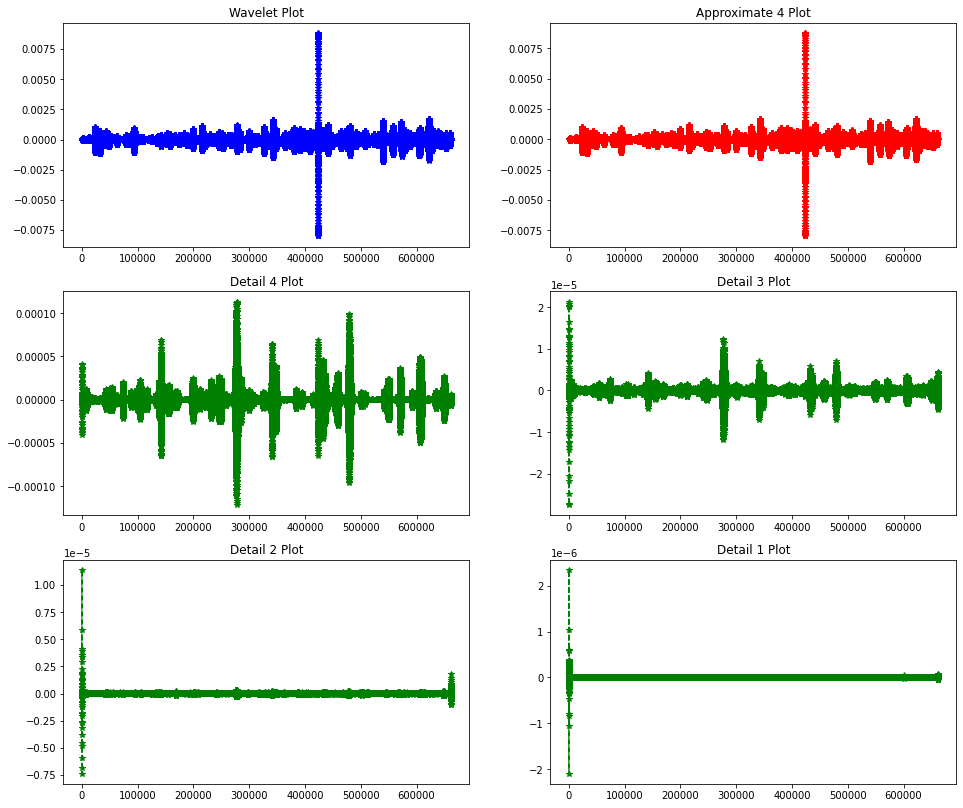

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(16,14))
  
axis[0, 0].plot(wavelets, '--*b')
axis[0, 0].set_title("Wavelet Plot")
  
axis[0, 1].plot(A4, '--*r')
axis[0, 1].set_title("Approximate 4 Plot")
  
axis[1, 0].plot(D4, '--*g')
axis[1, 0].set_title("Detail 4 Plot")

axis[1, 1].plot(D3, '--*g')
axis[1, 1].set_title("Detail 3 Plot")

axis[2, 0].plot(D2, '--*g')
axis[2, 0].set_title("Detail 2 Plot")

axis[2, 1].plot(D1, '--*g')
axis[2, 1].set_title("Detail 1 Plot")

plt.show()